<a href="https://colab.research.google.com/github/Abanoub1111/Machine-Learning-project/blob/main/translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# English to Arabic Translation

## Imports

In [2]:
#!pip uninstall -y torch torchtext

Found existing installation: torch 2.7.0
Uninstalling torch-2.7.0:
  Successfully uninstalled torch-2.7.0
Found existing installation: torchtext 0.18.0
Uninstalling torchtext-0.18.0:
  Successfully uninstalled torchtext-0.18.0


In [3]:
#!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchtext==0.15.2 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 388.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 109.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89990 sha256=6568638c79d3b1da3c1aa4849dcefb7cfa620ed679828bd166db882d19a2a986
  Stored in directory: /root/.cache/pip/wheels/fc/5d/45/34fe9945d5e45e261134e72284395be36c2d4828af38e2b0fe
Successfully built lit
  Attempting uninstall: triton
    Found existing installation: triton 3.3.0
    Uninstalling triton-3.3.0:
      Successfully uninstalled triton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
import re
import os
import string
import pandas as pd
import regex as re
import nltk
from unicodedata import normalize
from pickle import load
from pickle import dump
from collections import Counter

import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.ar import Arabic


import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter


os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [3]:
!pip install torchtext.legacy

ERROR: Could not find a version that satisfies the requirement torchtext.legacy (from versions: none)
ERROR: No matching distribution found for torchtext.legacy


In [2]:
from torchtext import data
from torchtext.legacy import data

ModuleNotFoundError: No module named 'torchtext.legacy'

In [2]:
#!pip install --upgrade torch  # Upgrade torch to ensure latest version and compatibility with torchtext
#!pip install --upgrade torchtext # Upgrade torchtext to ensure latest version and compatibility with torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

## Data Processing

In [5]:
df = pd.read_csv("data/arabic_english.txt",delimiter="\t",names=["eng","ar"])
df

#data = pd.read_csv("arabic_english.txt",delimiter="\t",names=["eng","ar"])
#data

,eng,ar
0,Hi.,مرحبًا.
1,Run!,اركض!
2,Help!,النجدة!
3,Jump!,اقفز!
4,Stop!,قف!
...,...,...
24633,rising voices promoting a more linguistically ...,شاركنا تحدي ابداع ميم بلغتك الام تعزيزا للتنوع...
24634,following last year s successful campaign we i...,استكمالا لنجاح حملة العام السابق ندعوكم للمشار...
24635,during last year s challenge we also met langu...,تعرفنا خلال تحدي العام الماضي على ابطال لغويين...
24636,to take part just follow the simple steps outl...,للمشاركة في التحدي اتبع الخطوات الموضحة على ال...


In [6]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='utf-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# split a loaded document into sentences
def to_sentences(doc):
	return doc.strip().split('\n')

# shortest and longest sentence lengths
def sentence_lengths(sentences):
	lengths = [len(s.split()) for s in sentences]
	return min(lengths), max(lengths)

arabic_stopwords = set(nltk.corpus.stopwords.words("arabic"))
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''

punctuations = arabic_punctuations + string.punctuation
def remove_stopwords(text):
    filtered_sentence = [w for w in text.split() if not w in punctuations]
    return ' '.join(filtered_sentence)

def clean_Data(line):
    if (isinstance(line, float)):
        return None
    line.replace('\n', ' ')
    line = ' '.join(line)
    translator = str.maketrans('', '', punctuations)
    line = line.translate(translator)
    line = ' '.join(line)
    return line

data.eng = data.eng.apply(clean_Data)

In [7]:
!python -m spacy download en_core_web_sm
# Reload spacy
import importlib
import spacy
importlib.reload(spacy)

# Now load the model
nlp = spacy.load("en_core_web_sm")

# Test it
doc = nlp("Hello, I am learning deep learning!")
for token in doc:
    print(token.text, token.pos_)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 117.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Hello INTJ
, PUNCT
I PRON
am AUX
learning VERB
deep ADJ
learning NOUN
! PUNCT


In [8]:
data.to_csv('data.txt')
df = pd.read_csv("data.txt")
df = df.drop(df.columns[0], axis=1)
df

,eng,ar
0,H i,مرحبًا.
1,R u n,اركض!
2,H e l p,النجدة!
3,J u m p,اقفز!
4,S t o p,قف!
...,...,...
24633,r i s i n g v o i c e ...,شاركنا تحدي ابداع ميم بلغتك الام تعزيزا للتنوع...
24634,f o l l o w i n g l a ...,استكمالا لنجاح حملة العام السابق ندعوكم للمشار...
24635,d u r i n g l a s t ...,تعرفنا خلال تحدي العام الماضي على ابطال لغويين...
24636,t o t a k e p a r t ...,للمشاركة في التحدي اتبع الخطوات الموضحة على ال...


### tokenizers

In [9]:
seed=32

spacy_eng = spacy.load("en_core_web_sm")

arab = Arabic()
ar_Tokenizer = Tokenizer(arab.vocab)

def engTokenizer(text):
 return  [word.text for word in spacy_eng.tokenizer(text)]

def arTokenizer(sentence):
    return  [word.text for word in
             ar_Tokenizer(re.sub(r"\s+"," ",re.sub(r"[\.\'\"\n+]"," ",sentence)).strip())]

SRC = data.Field(tokenize=engTokenizer,batch_first=False,init_token="<sos>",eos_token="<eos>")
TRG = data.Field(tokenize=arTokenizer,batch_first=False,tokenizer_language="ar",init_token="بداية",eos_token="نهاية")

class TextDataset(data.Dataset):

    def __init__(self, df, src_field, target_field, is_test=False, **kwargs):
        fields = [('eng', src_field), ('ar',target_field)]
        samples = []
        for i, row in df.iterrows():
            eng = row.eng
            ar = row.ar
            samples.append(data.Example.fromlist([eng, ar], fields))

        super().__init__(samples, fields, **kwargs)
    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

torchdataset = TextDataset(df,SRC,TRG)

train_data, valid_data = torchdataset.split(split_ratio=0.8, random_state = random.seed(32))

SRC.build_vocab(train_data,min_freq=2)
TRG.build_vocab(train_data,min_freq=2)

print(train_data[1].__dict__)


AttributeError: 'DataFrame' object has no attribute 'Field'

### seting up the device

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print(device)
print(torch.cuda.get_device_name(0))
# full infos
# !nvidia-smi

cuda
NVIDIA GeForce RTX 3060 Ti


## Transformer Class

In [ ]:
class Transformer(nn.Module):
    def __init__(
        self,
        embedding_size,
        src_vocab_size,
        trg_vocab_size,
        src_pad_idx,
        num_heads,
        num_encoder_layers,
        num_decoder_layers,
        max_len,
    ):
        super(Transformer, self).__init__()
        self.src_embeddings = nn.Embedding(src_vocab_size,embedding_size)
        self.src_positional_embeddings= nn.Embedding(max_len,embedding_size)
        self.trg_embeddings= nn.Embedding(trg_vocab_size,embedding_size)
        self.trg_positional_embeddings= nn.Embedding(max_len,embedding_size)
        self.device = device
        self.transformer = nn.Transformer(
            embedding_size,
            num_heads,
            num_encoder_layers,
            num_decoder_layers,
        )

        self.fc_out = nn.Linear(embedding_size, trg_vocab_size)
        self.dropout = nn.Dropout(dropout)
        self.src_pad_idx = src_pad_idx

    def make_src_mask(self, src):
        src_mask = src.transpose(0,1) == self.src_pad_idx

        return src_mask.to(device)

    def forward(self,src,trg) :
        src_seq_length, S = src.shape
        trg_seq_length, S = trg.shape
        #adding zeros is an easy way
        src_positions = (
            torch.arange(0, src_seq_length).unsqueeze(1).expand(src_seq_length, S).to(self.device)
        )


        trg_positions = (
            torch.arange(0, trg_seq_length).unsqueeze(1).expand(trg_seq_length, S).to(self.device)
        )

        embed_src  = self.dropout(
                ( self.src_embeddings(src) + self.src_positional_embeddings(src_positions) )
            )

        embed_trg = self.dropout(
                ( self.trg_embeddings(trg) + self.trg_positional_embeddings(trg_positions) )
            )

        src_padding_mask = self.make_src_mask(src)
        trg_mask = self.transformer.generate_square_subsequent_mask(trg_seq_length).to(device)


        out = self.transformer(embed_src,embed_trg, src_key_padding_mask=src_padding_mask,tgt_mask=trg_mask )
        out= self.fc_out(out)

        return out

## Model and Parameters

In [ ]:
BATCH_SIZE = 16

train_iter, valid_iter = data.BucketIterator.splits(
    (train_data,valid_data),
    batch_size = BATCH_SIZE,
    sort=None,
    sort_within_batch=False,
    sort_key=lambda x: len(x.eng),
    device=device,
    shuffle=True
)

In [ ]:
load_model = False
save_model = True

num_epochs = 30
learning_rate = 0.0001

num_heads = 8
num_encoder_layers = 3
num_decoder_layers = 3

max_len= 230
dropout = 0.4
embedding_size= 256
src_pad_idx = SRC.vocab.stoi["<pad>"]


src_vocab_size  = len(SRC.vocab)
print("Size of english vocabulary:",src_vocab_size)

trg_vocab_size =len(TRG.vocab)
print("Size of arabic vocabulary:",trg_vocab_size)


model = Transformer(
    embedding_size,
    src_vocab_size,
    trg_vocab_size,
    src_pad_idx,
    num_heads,
    num_encoder_layers,
    num_decoder_layers,
    max_len,
).to(device)



Size of english vocabulary: 12812
Size of arabic vocabulary: 22067


In [ ]:
print(model)

Transformer(
  (src_embeddings): Embedding(12812, 256)
  (src_positional_embeddings): Embedding(230, 256)
  (trg_embeddings): Embedding(22067, 256)
  (trg_positional_embeddings): Embedding(230, 256)
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (sel

## Training

In [ ]:
torch.cuda.empty_cache()

In [ ]:
loss_track = []
loss_validation_track= []


optimizer = optim.Adam(model.parameters(), lr=learning_rate)

pad_idx = SRC.vocab.stoi["<pad>"]
criterion = nn.CrossEntropyLoss(ignore_index = pad_idx)
for epoch in range(num_epochs):
    stepLoss=[]
    model.train()
    for batch  in train_iter:
        input_data = batch.eng.to(device)
        target = batch.ar.to(device)

        output = model(input_data,target[:-1])
        optimizer.zero_grad()

        output = output.reshape(-1,trg_vocab_size)
        target = target[1:].reshape(-1)

        loss = criterion(output,target)
        loss.backward()

        optimizer.step()
        stepLoss.append(loss.item())

    loss_track.append(np.mean(stepLoss))
    print(" Epoch {} | Train Cross Entropy Loss: ".format(epoch),np.mean(stepLoss))
    with torch.no_grad():
      stepValidLoss=[]
      model.eval() # the evaluation mode for the model (doesn't apply dropout and batchNorm)
      for i,batch  in enumerate(valid_iter):
            input_sentence = batch.eng.to(device)
            target = batch.ar.to(device)
            optimizer.zero_grad()
            output = model(input_sentence,target[:-1])
            output = output.reshape(-1,trg_vocab_size)
            target = target[1:].reshape(-1)
            loss = criterion(output,target)

            stepValidLoss.append(loss.item())

    loss_validation_track.append(np.mean(stepValidLoss))
    print(" Epoch {} | Validation Cross Entropy Loss: ".format(epoch),np.mean(stepValidLoss))

 Epoch 0 | Train Cross Entropy Loss:  7.435049949141292
 Epoch 0 | Validation Cross Entropy Loss:  5.988370576462188
 Epoch 1 | Train Cross Entropy Loss:  6.977232069164128
 Epoch 1 | Validation Cross Entropy Loss:  5.755757348103956
 Epoch 2 | Train Cross Entropy Loss:  6.727246981162529
 Epoch 2 | Validation Cross Entropy Loss:  5.524308341664153
 Epoch 3 | Train Cross Entropy Loss:  6.47047579946456
 Epoch 3 | Validation Cross Entropy Loss:  5.395510543476451
 Epoch 4 | Train Cross Entropy Loss:  6.229757437845329
 Epoch 4 | Validation Cross Entropy Loss:  5.26321325131825
 Epoch 5 | Train Cross Entropy Loss:  5.9832683666185895
 Epoch 5 | Validation Cross Entropy Loss:  5.190949131142009
 Epoch 6 | Train Cross Entropy Loss:  5.732032602870619
 Epoch 6 | Validation Cross Entropy Loss:  5.094015572752271
 Epoch 7 | Train Cross Entropy Loss:  5.481263580647382
 Epoch 7 | Validation Cross Entropy Loss:  5.061300001361153
 Epoch 8 | Train Cross Entropy Loss:  5.221863861207838
 Epoch 8 

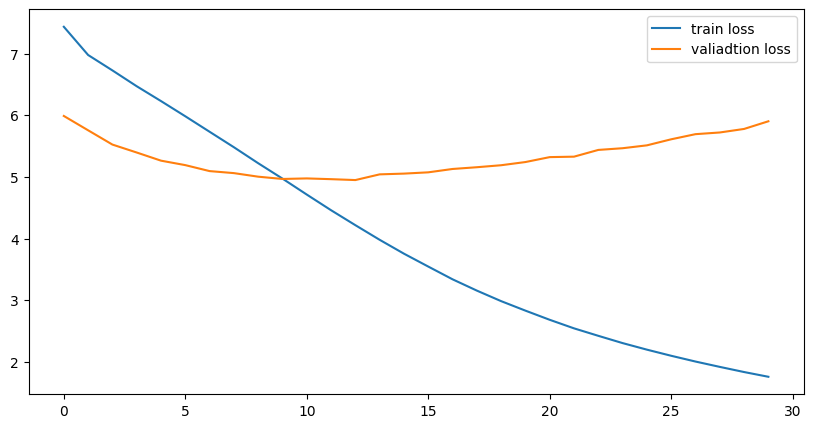

In [ ]:
#the train loss after 50 epoch
plt.figure(figsize=(10,5))
plt.plot(range(30),loss_track,label="train loss")
plt.plot(range(30),loss_validation_track,label="valiadtion loss")
plt.legend()
plt.show()

## Translation

In [ ]:
def translate_sentence(model,sentence,srcField,targetField,srcTokenizer):
    model.eval()
    processed_sentence = srcField.process([srcTokenizer(sentence)]).to(device)
    trg = ["بداية"]

    for _ in range(60):
        trg_indecies = [targetField.vocab.stoi[word] for word in trg]
        trg_tensor = torch.LongTensor(trg_indecies).unsqueeze(1).to(device)
        outputs = model(processed_sentence,trg_tensor)

        if targetField.vocab.itos[outputs.argmax(2)[-1:].item()] == "<unk>":
            continue
        trg.append(targetField.vocab.itos[outputs.argmax(2)[-1:].item()])
        if targetField.vocab.itos[outputs.argmax(2)[-1:].item()] == "نهاية":
            break
    return " ".join([word for word in trg if word != "<unk>"][1:-1])


In [ ]:
translate_sentence(model,"I'm ready" ,SRC,TRG,engTokenizer)

'أنا مستعد'

In [ ]:
translate_sentence(model,"i'm lucky" ,SRC,TRG,engTokenizer)

'انا محظوظ'

In [ ]:
translate_sentence(model,"I'm sad" ,SRC,TRG,engTokenizer)

'أنا حزين'